# pyyrk

This implements the classical [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) algorithm.

## Install

### Normal

    pip install pyrk

### Development

    python setup.py develop

To uninstall:

    python setup.py develop --uninstall

In [ ]:
from __future__ import division, print_function
from pyrk import RK4
import numpy as np
import matplotlib.pyplot as plt

## Unforced Dynamics

For a simple [Vander Pole Oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

$$\ddot x = \mu(1-x^2) \dot x + x$$

In [2]:
def vanderpol(t, xi, u):
    dx, x = xi
    mu = 4.0 # damping

    ddx = mu*(1-x**2)*dx-x
    dx = dx 
    
    return np.array([ddx, dx])

In [3]:
rk = RK4(vanderpol)
t, y = rk.solve(np.array([0, 1]), .01, 200)

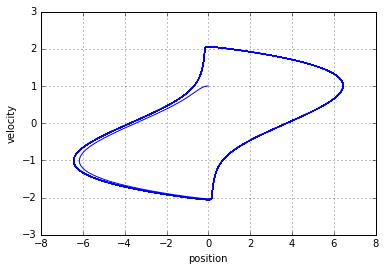

In [4]:
y1 = []
y2 = []
for v in y:
    y1.append(v[0])
    y2.append(v[1])

plt.plot(y1, y2)
plt.ylabel('velocity')
plt.xlabel('position')
plt.grid(True)
plt.show()

## Dynamics with Control Input

If you need to include a control input at each step, then you can do this:

In [5]:
def msd(t, xi, u):
    dx, x = xi
    
    m = 5
    k = 5
    d = 1
    
    ddx = (u - d*dx - k*x)/m
    dx = dx
    
    return np.array([ddx, dx])

In [6]:
from math import sin, pi

control = 0.1*np.linspace(-pi, pi, 2000)

rk = RK4(msd)
y = np.array([0,0])
t = 0.0
step = 0.01

yi = []
ti = []

for u in control:
    y = rk.step(y,sin(u),t,step)
    t += step
    ti.append(t)
    yi.append(y)

v = []
p = []
for y in yi:
    v.append(y[0])  # velocity
    p.append(y[1])  # position

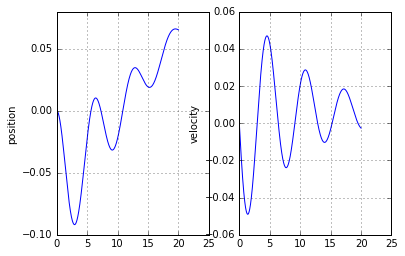

In [7]:
plt.subplot(1,2,1)
plt.plot(ti,p)
plt.ylabel('position')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ti,v)
plt.ylabel('velocity')
plt.grid(True)

plt.show()